<a href="https://colab.research.google.com/github/DuilioEGomez/BigData_And_MachineLearning/blob/main/GRUPO_23___LABORATORIO_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Laboratorio Clustering - Big Data & Machine Learning - Grupo 23 - Gálvez, Juan Manuel Ignacio; Gómez, Duilio Enrique; Munuce, Juan Jose **


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

In [4]:
# Decidimos instalar la librería plotly para poder hacer una visualización gráfica interactiva del entrenamiento realizado al machine learning con k-means
!pip install plotly

In [5]:
# Acá cargamos el csv de crimenes y lo convertimos en DataFrame
url_csv = "/content/drive/MyDrive/Colab Notebooks/Crimenes.csv"
df_crimenes = pd.read_csv(url_csv)
df_crimenes

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
# Lo que queremos lograr en este bloque de código es sacar el Z-Score de cada uno de los crímenes.
# Aunque lo primero que debemos hacer es multiplicar los valores de cada uno de los crímenes por el de la
# población urbana y después recién sacar el Z-Score de esos resultados porque ahí si podremos conseguir
# valores de Z-Score para cada crimen pero con la influencia de la población urbana ya contemplada dentro
# de dicho resultado.

# Este fue realmente el primer gran desafío que sinceramente no pudimos solucionar hasta que el docente
# nos brindó una pequeña ayuda informándonos que para sacar el Z-score de cada crimen pero al mismo tiempo
# teniendo en cuenta la influencia del factor de población urbana había que hacer el procedimiento
# explicado en el comentario de arriba y ejecutado aquí debajo.
df_crimenes['Asesinatos_por_Poblacion'] = df_crimenes['Asesinatos'] * df_crimenes['Poblacion Urbana']
df_crimenes['Asaltos_por_Poblacion'] = df_crimenes['Asaltos'] * df_crimenes['Poblacion Urbana']
df_crimenes['Violaciones_por_Poblacion'] = df_crimenes['Violaciones'] * df_crimenes['Poblacion Urbana']

# Seleccionar las columnas de interés para calcular los Z-scores
columns_to_zscore = ['Asesinatos_por_Poblacion', 'Asaltos_por_Poblacion', 'Violaciones_por_Poblacion']

# Calcular Z-score para las columnas seleccionadas
zscore_df = df_crimenes[columns_to_zscore].apply(zscore)

# Añadir los Z-scores al nuevo DataFrame que llamaremos "df_zscored"
df_zscored = pd.concat([df_crimenes['Estado'], zscore_df.add_suffix('_Zscore')], axis=1)

# Visualizar el nuevo DataFrame con los Z-scores añadidos
df_zscored

,Estado,Asesinatos_por_Poblacion_Zscore,Asaltos_por_Poblacion_Zscore,Violaciones_por_Poblacion_Zscore
0,Alabama,0.845308,0.341787,-0.271110
1,Alaska,-0.117000,0.175759,0.863408
2,Arizona,0.449064,1.875986,1.293984
3,Arkansas,-0.251777,-0.311714,-0.589787
4,California,1.025236,2.125028,2.814269
5,Colorado,0.341916,0.688823,1.968137
6,Connecticut,-0.878154,-0.472437,-0.740363
7,Delaware,-0.302992,0.879817,-0.386264
8,Florida,2.416809,2.387801,1.384105
9,Georgia,1.783357,0.181376,0.127423


In [7]:
# En esta sección, estamos definiendo los criterios para clasificar los niveles de peligrosidad en función de los datos de z-scores de los crímenes.
# Estableceremos umbrales para cada crimen, dividiendo los valores en tres categorías: baja, media y alta peligrosidad.
# Para cada tipo de crimen (asesinatos, asaltos y violaciones), definimos los umbrales que marcarán las categorías.
# Utilizamos los cuantiles para determinar estos umbrales:
# - Valores inferiores al 33% de todos los datos se consideran de baja peligrosidad.
# - Valores entre el 33% y el 66% se consideran de media peligrosidad.
# - Valores superiores al 66% se consideran de alta peligrosidad.
# Luego, aplicamos estas clasificaciones a nuestro DataFrame principal ("df_zscored") utilizando la función "clasificar_peligrosidad".
# Esta función evalúa cada valor en las columnas normalizadas de crimen y asigna una etiqueta de peligrosidad según los umbrales definidos.

# A continuación, aplicamos este proceso para cada crimen específico (asesinatos, asaltos y violaciones),
# agregando las columnas correspondientes de peligrosidad al DataFrame principal.
# Finalmente, mostramos el DataFrame resultante con estas nuevas columnas de peligrosidad.

# Calcular los umbrales para la clasificación de peligrosidad en el DataFrame de asesinatos
umbral_bajo = df_zscored['Asesinatos_por_Poblacion_Zscore'].quantile(0.33)
umbral_alto = df_zscored['Asesinatos_por_Poblacion_Zscore'].quantile(0.66)

# Función para asignar la clasificación de peligrosidad
def clasificar_peligrosidad(valor):
    if valor > umbral_alto:
        return 'Alta Peligrosidad'
    elif valor < umbral_bajo:
        return 'Baja Peligrosidad'
    else:
        return 'Media Peligrosidad'

# Aplicar la función de clasificación al DataFrame de asesinatos
df_zscored['Asesinatos_Peligrosidad'] = df_zscored['Asesinatos_por_Poblacion_Zscore'].apply(clasificar_peligrosidad)

# Calcular los umbrales para la clasificación de peligrosidad en el DataFrame de asesinatos
umbral_bajo = df_zscored['Asaltos_por_Poblacion_Zscore'].quantile(0.33)
umbral_alto = df_zscored['Asaltos_por_Poblacion_Zscore'].quantile(0.66)

# Función para asignar la clasificación de peligrosidad
def clasificar_peligrosidad(valor):
    if valor > umbral_alto:
        return 'Alta Peligrosidad'
    elif valor < umbral_bajo:
        return 'Baja Peligrosidad'
    else:
        return 'Media Peligrosidad'

# Aplicar la función de clasificación al DataFrame de asesinatos
df_zscored['Asaltos_Peligrosidad'] = df_zscored['Asaltos_por_Poblacion_Zscore'].apply(clasificar_peligrosidad)

# Calcular los umbrales para la clasificación de peligrosidad en el DataFrame de asesinatos
umbral_bajo = df_zscored['Violaciones_por_Poblacion_Zscore'].quantile(0.33)
umbral_alto = df_zscored['Violaciones_por_Poblacion_Zscore'].quantile(0.66)

# Función para asignar la clasificación de peligrosidad
def clasificar_peligrosidad(valor):
    if valor > umbral_alto:
        return 'Alta Peligrosidad'
    elif valor < umbral_bajo:
        return 'Baja Peligrosidad'
    else:
        return 'Media Peligrosidad'

# Aplicar la función de clasificación al DataFrame de asesinatos
df_zscored['Violaciones_Peligrosidad'] = df_zscored['Violaciones_por_Poblacion_Zscore'].apply(clasificar_peligrosidad)

df_zscored

,Estado,Asesinatos_por_Poblacion_Zscore,Asaltos_por_Poblacion_Zscore,Violaciones_por_Poblacion_Zscore,Asesinatos_Peligrosidad,Asaltos_Peligrosidad,Violaciones_Peligrosidad
0,Alabama,0.845308,0.341787,-0.271110,Alta Peligrosidad,Alta Peligrosidad,Media Peligrosidad
1,Alaska,-0.117000,0.175759,0.863408,Media Peligrosidad,Media Peligrosidad,Alta Peligrosidad
2,Arizona,0.449064,1.875986,1.293984,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
3,Arkansas,-0.251777,-0.311714,-0.589787,Media Peligrosidad,Media Peligrosidad,Baja Peligrosidad
4,California,1.025236,2.125028,2.814269,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
5,Colorado,0.341916,0.688823,1.968137,Media Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
6,Connecticut,-0.878154,-0.472437,-0.740363,Baja Peligrosidad,Media Peligrosidad,Baja Peligrosidad
7,Delaware,-0.302992,0.879817,-0.386264,Media Peligrosidad,Alta Peligrosidad,Media Peligrosidad
8,Florida,2.416809,2.387801,1.384105,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
9,Georgia,1.783357,0.181376,0.127423,Alta Peligrosidad,Media Peligrosidad,Media Peligrosidad


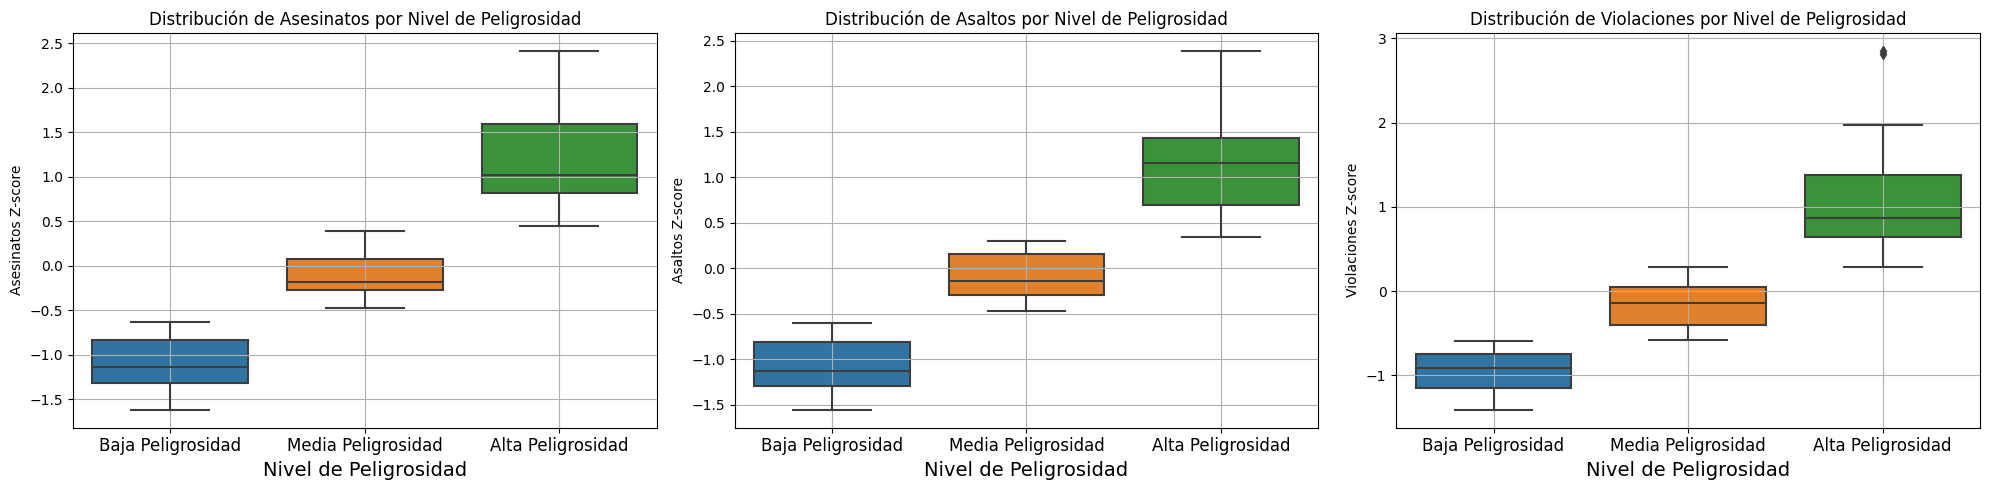

In [8]:
# Aquí asignamos en múltiples variables la correlación entre cada uno de los niveles de peligrosidad con
# cada uno de los valores de los crímenes, básicamente creando columnas auxiliares que se llamarán
# "Asaltos_Peligrosidad", "Asesinatos_Peligrosidad" y "Violaciones_Peligrosidad".
# Posteriormente asignamos dichas variables por medio de arrays a las variables datos que
# utilizaremos para después hacer un gráfico de velas que represente los valores de Z-scores de los
# crímenes en base a los niveles de peligrosidad.
# El eje y serán los valores Z-scores y el eje x tendra los valores de peligrosidad.

# Datos de asaltos por nivel de peligrosidad
asaltos_baja_peligrosidad = df_zscored[df_zscored['Asaltos_Peligrosidad'] == 'Baja Peligrosidad']['Asaltos_por_Poblacion_Zscore']
asaltos_media_peligrosidad = df_zscored[df_zscored['Asaltos_Peligrosidad'] == 'Media Peligrosidad']['Asaltos_por_Poblacion_Zscore']
asaltos_alta_peligrosidad = df_zscored[df_zscored['Asaltos_Peligrosidad'] == 'Alta Peligrosidad']['Asaltos_por_Poblacion_Zscore']

# Datos de asesinatos por nivel de peligrosidad
asesinatos_baja_peligrosidad = df_zscored[df_zscored['Asesinatos_Peligrosidad'] == 'Baja Peligrosidad']['Asesinatos_por_Poblacion_Zscore']
asesinatos_media_peligrosidad = df_zscored[df_zscored['Asesinatos_Peligrosidad'] == 'Media Peligrosidad']['Asesinatos_por_Poblacion_Zscore']
asesinatos_alta_peligrosidad = df_zscored[df_zscored['Asesinatos_Peligrosidad'] == 'Alta Peligrosidad']['Asesinatos_por_Poblacion_Zscore']

# Datos de violaciones por nivel de peligrosidad
violaciones_baja_peligrosidad = df_zscored[df_zscored['Violaciones_Peligrosidad'] == 'Baja Peligrosidad']['Violaciones_por_Poblacion_Zscore']
violaciones_media_peligrosidad = df_zscored[df_zscored['Violaciones_Peligrosidad'] == 'Media Peligrosidad']['Violaciones_por_Poblacion_Zscore']
violaciones_alta_peligrosidad = df_zscored[df_zscored['Violaciones_Peligrosidad'] == 'Alta Peligrosidad']['Violaciones_por_Poblacion_Zscore']

# Datos para los boxplots
asesinatos_data = [asesinatos_baja_peligrosidad, asesinatos_media_peligrosidad, asesinatos_alta_peligrosidad]
asaltos_data = [asaltos_baja_peligrosidad, asaltos_media_peligrosidad, asaltos_alta_peligrosidad]
violaciones_data = [violaciones_baja_peligrosidad, violaciones_media_peligrosidad, violaciones_alta_peligrosidad]

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Boxplot para Asesinatos
sns.boxplot(data=asesinatos_data, ax=axes[0])
axes[0].set_xticks(ticks=[0, 1, 2])
axes[0].set_xticklabels(['Baja Peligrosidad', 'Media Peligrosidad', 'Alta Peligrosidad'], fontsize=12)
axes[0].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[0].set_ylabel('Asesinatos Z-score')
axes[0].set_title('Distribución de Asesinatos por Nivel de Peligrosidad')
axes[0].grid(True)

# Boxplot para Asaltos
sns.boxplot(data=asaltos_data, ax=axes[1])
axes[1].set_xticks(ticks=[0, 1, 2])
axes[1].set_xticklabels(['Baja Peligrosidad', 'Media Peligrosidad', 'Alta Peligrosidad'], fontsize=12)
axes[1].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[1].set_ylabel('Asaltos Z-score')
axes[1].set_title('Distribución de Asaltos por Nivel de Peligrosidad')
axes[1].grid(True)

# Boxplot para Violaciones
sns.boxplot(data=violaciones_data, ax=axes[2])
axes[2].set_xticks(ticks=[0, 1, 2])
axes[2].set_xticklabels(['Baja Peligrosidad', 'Media Peligrosidad', 'Alta Peligrosidad'], fontsize=12)
axes[2].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[2].set_ylabel('Violaciones Z-score')
axes[2].set_title('Distribución de Violaciones por Nivel de Peligrosidad')
axes[2].grid(True)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [9]:
# En este bloque primero crearemos una variable que en lugar de tener los
# nombres de los estados, tenga las abreviaturas de los mismos, este fue el
# primer verdadero obstáculo que tuvimos y que realmente nos
# retrasó debido a que tardamos en averiguar que el gráfico de calor
# (go.Figure(data=go.Choropleth) de Estados Unidos solamente acepta como
# "locations" a las abreviaturas de los estados, caso contrario
# (como nos pasó al principio) el gráfico simplemente queda en blanco.

# Para no entorpecer ni mezclar estos nuevos datos con los datos del dataframe
# original, decidimos crear un dataframe auxiliar que se llama
# "df_auxiliar_estados_zscores"
abreviaturas = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Crear un DataFrame vacío
df_auxiliar_estados_zscores = pd.DataFrame()

# Convertir los nombres de estados a sus abreviaturas
abreviaturas_estados = [abreviaturas[estado] for estado in df_zscored['Estado']]

# Agregar la lista de las abreviaturas de los estados como la primera columna 'Estado'
df_auxiliar_estados_zscores['Estado'] = abreviaturas_estados

# Como se comentó en el comentario inicial de este bloque, copiamos las columnas de los Z-scores de los crimenes desde "df_zscored"
df_auxiliar_estados_zscores['Asesinatos_por_Poblacion_Zscore'] = df_zscored['Asesinatos_por_Poblacion_Zscore']
df_auxiliar_estados_zscores['Asaltos_por_Poblacion_Zscore'] = df_zscored['Asaltos_por_Poblacion_Zscore']
df_auxiliar_estados_zscores['Violaciones_por_Poblacion_Zscore'] = df_zscored['Violaciones_por_Poblacion_Zscore']

# Como se comentó en el comentario inicial de este bloque, copiamos las columnas de los indices de peligrosidad de los crimenes desde "df_zscored"
df_auxiliar_estados_zscores['Asesinatos_Peligrosidad'] = df_zscored['Asesinatos_Peligrosidad']
df_auxiliar_estados_zscores['Asaltos_Peligrosidad'] = df_zscored['Asaltos_Peligrosidad']
df_auxiliar_estados_zscores['Violaciones_Peligrosidad'] = df_zscored['Violaciones_Peligrosidad']



df_auxiliar_estados_zscores

,Estado,Asesinatos_por_Poblacion_Zscore,Asaltos_por_Poblacion_Zscore,Violaciones_por_Poblacion_Zscore,Asesinatos_Peligrosidad,Asaltos_Peligrosidad,Violaciones_Peligrosidad
0,AL,0.845308,0.341787,-0.271110,Alta Peligrosidad,Alta Peligrosidad,Media Peligrosidad
1,AK,-0.117000,0.175759,0.863408,Media Peligrosidad,Media Peligrosidad,Alta Peligrosidad
2,AZ,0.449064,1.875986,1.293984,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
3,AR,-0.251777,-0.311714,-0.589787,Media Peligrosidad,Media Peligrosidad,Baja Peligrosidad
4,CA,1.025236,2.125028,2.814269,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
5,CO,0.341916,0.688823,1.968137,Media Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
6,CT,-0.878154,-0.472437,-0.740363,Baja Peligrosidad,Media Peligrosidad,Baja Peligrosidad
7,DE,-0.302992,0.879817,-0.386264,Media Peligrosidad,Alta Peligrosidad,Media Peligrosidad
8,FL,2.416809,2.387801,1.384105,Alta Peligrosidad,Alta Peligrosidad,Alta Peligrosidad
9,GA,1.783357,0.181376,0.127423,Alta Peligrosidad,Media Peligrosidad,Media Peligrosidad


In [10]:
# En este bloque llevamos a cabo el código de la representación del gráfico de
# calor de Estados Unidos por nivel de peligrosidad de cada uno de los estados.
# En lugar de asignar un colo fijo a cada nivel de peligrosidad, decidimos hacer
# mas dinámica la representación no solamente usando la escala
# "[0, 'green'], [0.5, 'yellow'], [1, 'red']" sino que logramos que al poner el
# cursor encima de cada estado nos brinde la abreviatura del mismo, el z-score
# correspondiente del crimen en cuestión y el nivel de peligrosidad expresando
# en texto.

# Función para asignar colores a los zscores
def assign_color(zscore):
    min_val = -1.5
    max_val = 3

    # Mapeo lineal de z scores al rango de colores específico
    normalized = (zscore - min_val) / (max_val - min_val) * 5 - 1.5
    return normalized

def generar_mapa_calor(titulo, datos, columna_zscore, columna_peligrosidad):
    fig = go.Figure(data=go.Choropleth(
        locations=datos['Estado'],
        z=datos[columna_zscore].apply(assign_color),
        locationmode='USA-states',
        colorscale=[[0, 'green'], [0.5, 'yellow'], [1, 'red']],
        colorbar_title=f'{columna_zscore}',
        customdata=datos[columna_peligrosidad]
    ))

    fig.update_layout(
        title_text=titulo,
        geo_scope='usa'
    )

    # Agregar texto personalizado
    text = []
    for index, row in datos.iterrows():
        estado = row['Estado']
        zscore = row[columna_zscore]
        peligrosidad = row[columna_peligrosidad]
        text.append(f'{estado}<br>{columna_zscore}: {zscore:.2f}<br>Peligrosidad: {peligrosidad}')

    fig.update_traces(text=text, hoverinfo='text')

    return fig

# Generar mapas para Asesinatos, Asaltos y Violaciones
fig_asesinatos = generar_mapa_calor('Asesinatos Z-Score por Estado', df_auxiliar_estados_zscores, 'Asesinatos_por_Poblacion_Zscore', 'Asesinatos_Peligrosidad')
fig_asaltos = generar_mapa_calor('Asaltos Z-Score por Estado', df_auxiliar_estados_zscores, 'Asaltos_por_Poblacion_Zscore', 'Asaltos_Peligrosidad')
fig_violaciones = generar_mapa_calor('Violaciones Z-Score por Estado', df_auxiliar_estados_zscores, 'Violaciones_por_Poblacion_Zscore', 'Violaciones_Peligrosidad')

# Mostrar los mapas
fig_asesinatos.show()
fig_asaltos.show()
fig_violaciones.show()


In [11]:
# En los bloques anteiores usamos los Z-scores para llevar a cabo las representaciones gráficas
# y los análisis estadísticos que allí se presentaron. Pero de aquí en más, para el entrenamiento
# no supervisado utilizaremos el modelo de k-means y entrenaremos dicho modelo con los datos
# originales del dataframe que se asigno al principio de todo llamado "df_crimenes"

# Tomar las columnas relevantes para el clustering, aquí hubo otro pequeño desafío pero fue
# por una cuestión de ignorancia, dado que pensamos que si poníamos mas de 3 columnas
# como datos relevantes para el clustering, el gráfico 3d del k-means pasaría a ser de 4 dimensiones, pero
# no fue así, así que al final pudimos entrenar satisfactoriamente el modelo con todos los datos
# del dataframe original.
data = pd.concat([
    df_crimenes[['Asesinatos']],
    df_crimenes[['Asaltos']],
    df_crimenes[['Violaciones']],
    df_crimenes[['Poblacion Urbana']]
], axis=1)

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

# Asignar los clusters a un nuevo DataFrame
df_clusters = pd.DataFrame({
    'Estado': df_crimenes['Estado'],
    'Violaciones': df_crimenes['Violaciones'],
    'Asaltos': df_crimenes['Asaltos'],
    'Asesinatos': df_crimenes['Asesinatos'],
    'Cluster': clusters
})

# Crear DataFrame con datos normalizados y clusters
df_plotly = pd.DataFrame(data_normalized, columns=['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana'])
df_plotly['Estado'] = df_crimenes['Estado']
df_plotly['Cluster'] = clusters

# Crear el gráfico interactivo en 3D con Plotly
fig = px.scatter_3d(df_plotly, x='Asesinatos', y='Asaltos', z='Violaciones', color='Cluster', hover_data=['Estado'])

# Mostrar el gráfico
fig.show(width=1000, height=800)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [12]:
# Aquí podemos observar el dataframe en el cual se le asigna un cluster a cada unos
# de los estados.
df_clusters

,Estado,Violaciones,Asaltos,Asesinatos,Cluster
0,Alabama,21.2,236,13.2,1
1,Alaska,44.5,263,10.0,1
2,Arizona,31.0,294,8.1,1
3,Arkansas,19.5,190,8.8,2
4,California,40.6,276,9.0,1
5,Colorado,38.7,204,7.9,1
6,Connecticut,11.1,110,3.3,0
7,Delaware,15.8,238,5.9,0
8,Florida,31.9,335,15.4,1
9,Georgia,25.8,211,17.4,1


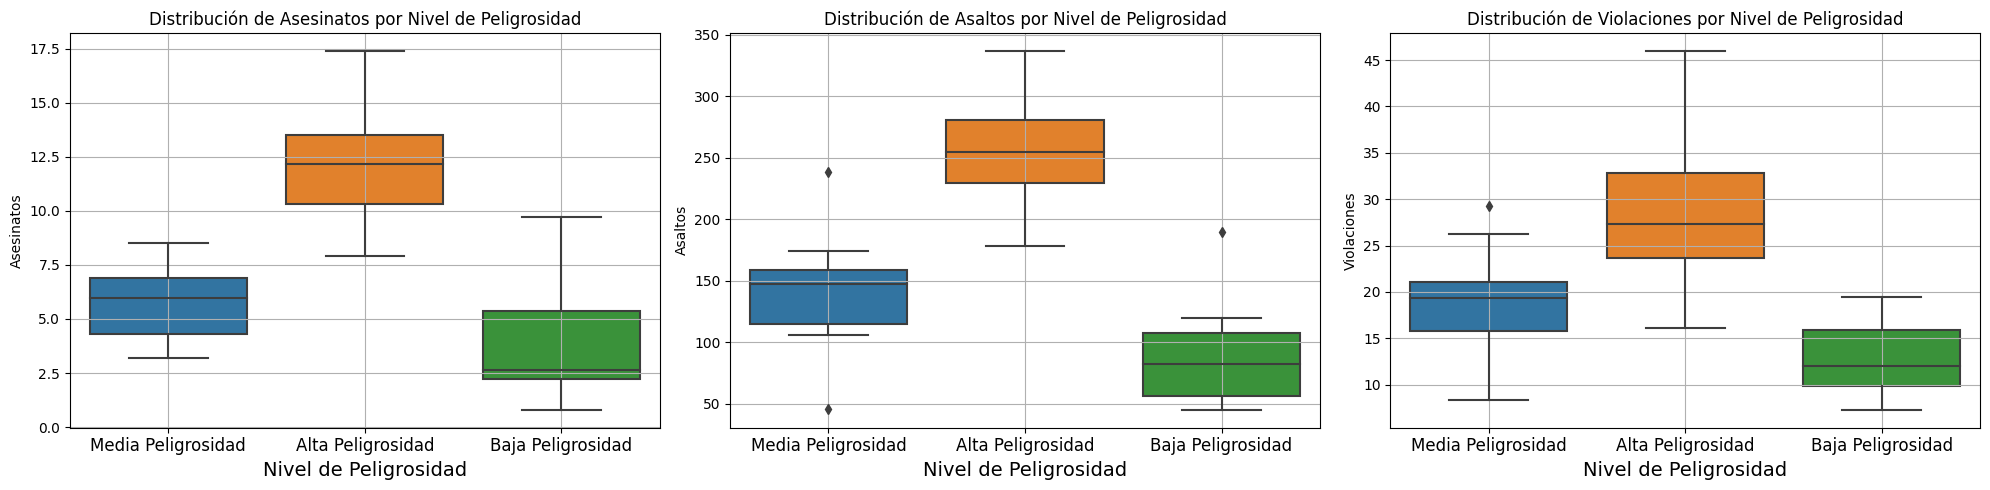

In [13]:
# Como podemos observar en el dataframe llamado "df_clusters" el cual fue creado en el mismo bloque
# donde se llevo a cabo el entrenamiento, podemos ver a cada estado se le asignó
# un cluster. Pero si no fuese por la representación gráfica interactiva en 3d que tenemos arriba
# generada por el modelo de k-means, no podríamos saber (sin analizar el código en profundidad)
# cual sería en nivel de peligrosidad en base al valor del cluster de manera inmediata.
# Es por ello que haremos nuevamente otro gráfico de velas pero esta vez
# utilizando los datos de nuestro nuevo dataframe "df_clusters" que nos sabrá determinar cual es el
# nivel de peligrosidad que representa cada cluster.

# Datos para los boxplots
asesinatos_data = [
    df_clusters[df_clusters['Cluster'] == 0]['Asesinatos'],
    df_clusters[df_clusters['Cluster'] == 1]['Asesinatos'],
    df_clusters[df_clusters['Cluster'] == 2]['Asesinatos']
]

asaltos_data = [
    df_clusters[df_clusters['Cluster'] == 0]['Asaltos'],
    df_clusters[df_clusters['Cluster'] == 1]['Asaltos'],
    df_clusters[df_clusters['Cluster'] == 2]['Asaltos']
]

violaciones_data = [
    df_clusters[df_clusters['Cluster'] == 0]['Violaciones'],
    df_clusters[df_clusters['Cluster'] == 1]['Violaciones'],
    df_clusters[df_clusters['Cluster'] == 2]['Violaciones']
]

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Boxplot para Asesinatos
sns.boxplot(data=asesinatos_data, ax=axes[0])
axes[0].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[0].set_ylabel('Asesinatos')
axes[0].set_title('Distribución de Asesinatos por Nivel de Peligrosidad')
axes[0].set_xticklabels(['Media Peligrosidad','Alta Peligrosidad', 'Baja Peligrosidad'], fontsize=12)
axes[0].grid(True)

# Boxplot para Asaltos
sns.boxplot(data=asaltos_data, ax=axes[1])
axes[1].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[1].set_ylabel('Asaltos')
axes[1].set_title('Distribución de Asaltos por Nivel de Peligrosidad')
axes[1].set_xticklabels(['Media Peligrosidad','Alta Peligrosidad', 'Baja Peligrosidad'], fontsize=12)
axes[1].grid(True)

# Boxplot para Violaciones
sns.boxplot(data=violaciones_data, ax=axes[2])
axes[2].set_xlabel('Nivel de Peligrosidad', fontsize=14)
axes[2].set_ylabel('Violaciones')
axes[2].set_title('Distribución de Violaciones por Nivel de Peligrosidad')
axes[2].set_xticklabels(['Media Peligrosidad','Alta Peligrosidad', 'Baja Peligrosidad'], fontsize=12)
axes[2].grid(True)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Finalmente al observar el gráfico, nos damos cuenta que el cluster 0 pertenece al nivel
# de peligrosidad media, el cluster 1 al nivel de peligrosidad alta y el cluster 2 al nivel
# de peligrosidad baja.